# Examples
> Some examples on working with p4tools

In [ ]:
import numpy as np

import pandas as pd
from p4tools.io import (
    get_blotch_catalog,
    get_blotches_for_tile,
    get_fan_catalog,
    get_fans_for_tile,
    get_region_names,
)

In [ ]:
rois = get_region_names()

In [ ]:
rois.roi_name.unique()

array(['Macclesfield', 'unknown', 'Starburst', 'Manhattan_Classic',
       'Wellington', 'Albany', 'Bilbao', 'Ithaca', 'Portsmouth', 'Pisaq',
       'Manhattan_Frontinella', 'BuenosAires', 'Inca_City_Ridges',
       'Inca_City', 'Giza', 'Potsdam', 'Troy', 'Oswego_Edge', 'Halifax',
       'Caterpillar', 'Rochester', 'Manhattan_Cracks', 'Schenectady',
       'Binghamton', 'Atka', 'Cortland', 'Geneseo', 'Manhattan2'],
      dtype=object)

In [ ]:
rois.query("roi_name=='Giza'").describe()

,lat_IND,lon_IND,minimal_distance,lat_WORD,lon_WORD,MY
count,35.000000,35.000000,35.000000,3.500000e+01,3.500000e+01,35.000000
mean,-84.829069,66.071666,6.318094,-8.482000e+01,6.570000e+01,29.057143
std,0.066423,0.991527,11.242504,2.883665e-14,1.441832e-14,1.027357
min,-84.979100,65.637800,0.720371,-8.482000e+01,6.570000e+01,28.000000
25%,-84.834950,65.736450,1.254355,-8.482000e+01,6.570000e+01,28.000000
50%,-84.812200,65.774200,1.487853,-8.482000e+01,6.570000e+01,29.000000
75%,-84.809350,65.799750,4.005964,-8.482000e+01,6.570000e+01,30.000000
max,-84.581900,69.890400,44.631912,-8.482000e+01,6.570000e+01,31.000000


In [ ]:
fans = get_fan_catalog()
blotches = get_blotch_catalog()

In [ ]:
fansperobsid = fans.groupby("obsid").size()

In [ ]:
fansperobsid.head()

obsid
ESP_011296_0975    4472
ESP_011341_0980     455
ESP_011348_0950       4
ESP_011350_0945    1107
ESP_011351_0945    1636
dtype: int64

In [ ]:
blotchesperobsid = blotches.groupby("obsid").size()
blotchesperobsid.head()

obsid
ESP_011296_0975    1014
ESP_011341_0980     283
ESP_011348_0950     195
ESP_011350_0945     625
ESP_011351_0945    1167
dtype: int64

In [ ]:
df = fansperobsid.to_frame()

In [ ]:
df["blotches counts"] = blotchesperobsid

In [ ]:
df.columns = ["fan_count_per_obsid", "blotch_count_per_obsid"]
df.head()

,fan_count_per_obsid,blotch_count_per_obsid
obsid,,
ESP_011296_0975,4472,1014
ESP_011341_0980,455,283
ESP_011348_0950,4,195
ESP_011350_0945,1107,625
ESP_011351_0945,1636,1167


In [ ]:
fan_counts_per_tile = fans.groupby("tile_id").size()
fan_counts_per_tile.head()

tile_id
APF0000001    3
APF0000006    4
APF0000009    1
APF000000b    1
APF000000c    4
dtype: int64

In [ ]:
blotch_counts_per_tile = blotches.groupby("tile_id").size()
blotch_counts_per_tile.head()

tile_id
APF0000001    1
APF0000002    2
APF0000004    4
APF0000005    5
APF0000006    7
dtype: int64

In [ ]:
fan_counts_per_tile.name = "fans"

In [ ]:
blotch_counts_per_tile.name = "blotches"

In [ ]:
df = pd.DataFrame(fan_counts_per_tile)

In [ ]:
df["blotches"] = blotch_counts_per_tile
df.head()

,fans,blotches
tile_id,,
APF0000001,3,1.0
APF0000006,4,7.0
APF0000009,1,26.0
APF000000b,1,3.0
APF000000c,4,3.0


In [ ]:
df[(df.fans + df.blotches) > 100].head()

,fans,blotches
tile_id,,
APF00002zj,99,4.0
APF00006mg,98,7.0
APF00006mt,118,2.0
APF00006mv,95,19.0
APF00006n0,43,58.0


### The input data products for the P4 project are the `_COLOR_ products one can find on the uahirise.org website!

In [ ]:
buffalo = "ESP_011486_0980_COLOR ESP_011987_0975_COLOR ESP_012198_0975_COLOR ESP_012277_0975_COLOR ESP_012620_0975_COLOR".split()

In [ ]:
buffalo = [i.rstrip("_COLOR") for i in buffalo]

In [ ]:
p4_buffalo = fans[fans.obsid.isin(buffalo)].obsid.unique()

In [ ]:
fans[fans.obsid.isin(p4_buffalo)].groupby("obsid").size()

obsid
ESP_011486_0980    242
ESP_012277_0975     19
ESP_012620_0975     30
dtype: int64

In [ ]:
fans[fans.obsid.isin(p4_buffalo)][["l_s", "obsid"]].drop_duplicates()

,l_s,obsid
124564,241.144,ESP_012620_0975
136301,187.254,ESP_011486_0980
139964,224.333,ESP_012277_0975


In [ ]:
fans[fans.tile_id.str.contains("r8y")]

,marking_id,angle,distance,tile_id,image_x,image_y,n_votes,obsid,spread,version,...,y_angle,l_s,map_scale,north_azimuth,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,Longitude
154795,F02a9f2,34.16,171.27,APF0000r8y,505.45,13038.68,19,ESP_020242_0945,41.85,1,...,0.56,184.557,1.0,143.674895,-63.560715,265.134952,-3370.241784,-85.374934,-85.428989,103.481087
154796,F02a9f3,38.19,86.92,APF0000r8y,387.19,12617.75,16,ESP_020242_0945,33.44,1,...,0.62,184.557,1.0,143.674895,-63.930749,264.887663,-3370.271982,-85.377575,-85.431599,103.568870
154797,F02a9f4,36.11,106.09,APF0000r8y,30.86,13128.72,18,ESP_020242_0945,36.90,1,...,0.59,184.557,1.0,143.674895,-63.883825,265.528290,-3370.208031,-85.367154,-85.421299,103.527769
154798,F02a9f5,76.52,63.91,APF0000r8y,32.33,13128.33,3,ESP_020242_0945,46.96,1,...,0.96,184.557,1.0,143.674895,-63.882893,265.526982,-3370.208168,-85.367179,-85.421324,103.527643
154799,F02a9f6,33.30,90.38,APF0000r8y,249.21,12781.71,14,ESP_020242_0945,25.57,1,...,0.55,184.557,1.0,143.674895,-63.935125,265.109183,-3370.249450,-85.373890,-85.427956,103.558845
154800,F02a9f7,32.72,77.35,APF0000r8y,204.00,13205.53,15,ESP_020242_0945,36.85,1,...,0.54,184.557,1.0,143.674895,-63.694249,265.469837,-3370.212149,-85.368868,-85.422993,103.491955
154801,F02a9f8,39.19,54.32,APF0000r8y,73.62,13114.42,12,ESP_020242_0945,30.04,1,...,0.63,184.557,1.0,143.674895,-63.858677,265.487992,-3370.211967,-85.367920,-85.422056,103.524616


In [ ]:
from p4tools.plotting import plot_blotches_for_tile, plot_fans_for_tile

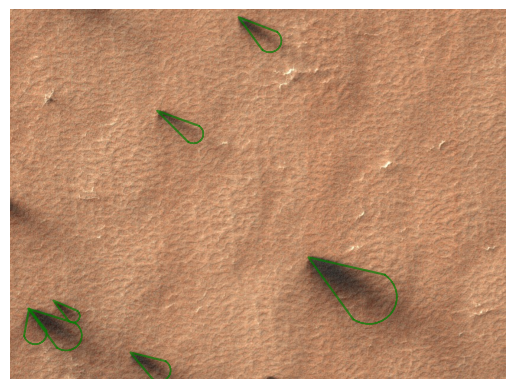

In [ ]:
plot_fans_for_tile("r8y")

In [ ]:
get_blotches_for_tile("r8y")  # no blotches, that's why below plot is empty

,marking_id,angle,tile_id,image_x,image_y,n_votes,obsid,radius_1,radius_2,vote_ratio,...,y_angle,l_s,map_scale,north_azimuth,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,Longitude


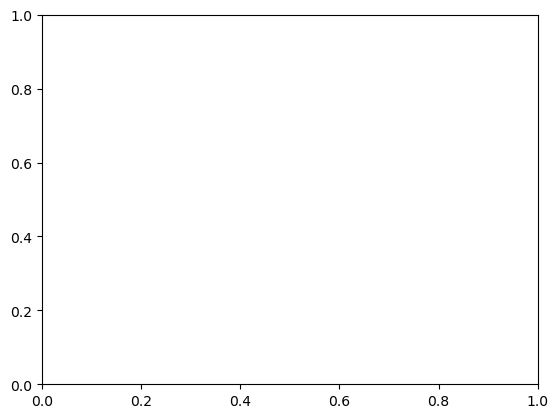

In [ ]:
plot_blotches_for_tile("APF0000r8y")

In [ ]:
get_fans_for_tile("APF0000r8y")

,marking_id,angle,distance,tile_id,image_x,image_y,n_votes,obsid,spread,version,...,y_angle,l_s,map_scale,north_azimuth,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,Longitude
154795,F02a9f2,34.16,171.27,APF0000r8y,505.45,13038.68,19,ESP_020242_0945,41.85,1,...,0.56,184.557,1.0,143.674895,-63.560715,265.134952,-3370.241784,-85.374934,-85.428989,103.481087
154796,F02a9f3,38.19,86.92,APF0000r8y,387.19,12617.75,16,ESP_020242_0945,33.44,1,...,0.62,184.557,1.0,143.674895,-63.930749,264.887663,-3370.271982,-85.377575,-85.431599,103.568870
154797,F02a9f4,36.11,106.09,APF0000r8y,30.86,13128.72,18,ESP_020242_0945,36.90,1,...,0.59,184.557,1.0,143.674895,-63.883825,265.528290,-3370.208031,-85.367154,-85.421299,103.527769
154798,F02a9f5,76.52,63.91,APF0000r8y,32.33,13128.33,3,ESP_020242_0945,46.96,1,...,0.96,184.557,1.0,143.674895,-63.882893,265.526982,-3370.208168,-85.367179,-85.421324,103.527643
154799,F02a9f6,33.30,90.38,APF0000r8y,249.21,12781.71,14,ESP_020242_0945,25.57,1,...,0.55,184.557,1.0,143.674895,-63.935125,265.109183,-3370.249450,-85.373890,-85.427956,103.558845
154800,F02a9f7,32.72,77.35,APF0000r8y,204.00,13205.53,15,ESP_020242_0945,36.85,1,...,0.54,184.557,1.0,143.674895,-63.694249,265.469837,-3370.212149,-85.368868,-85.422993,103.491955
154801,F02a9f8,39.19,54.32,APF0000r8y,73.62,13114.42,12,ESP_020242_0945,30.04,1,...,0.63,184.557,1.0,143.674895,-63.858677,265.487992,-3370.211967,-85.367920,-85.422056,103.524616


In [ ]:
get_blotches_for_tile("5g")

,marking_id,angle,tile_id,image_x,image_y,n_votes,obsid,radius_1,radius_2,vote_ratio,...,y_angle,l_s,map_scale,north_azimuth,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,Longitude
176515,B0319e4,37.52,APF000005g,542.44,26364.59,56,ESP_012254_1065,19.55,15.01,1.00,...,0.57,223.218,0.25,100.857869,900.726050,-336.053862,-3241.541739,-73.480739,-73.664238,339.539847
176516,B0319e5,38.16,APF000005g,462.73,26382.80,51,ESP_012254_1065,21.88,15.47,0.84,...,0.58,223.218,0.25,100.857869,900.739915,-336.038989,-3241.539335,-73.480601,-73.664101,339.540967
176517,B0319e6,38.65,APF000005g,407.45,26519.19,58,ESP_012254_1065,22.04,16.82,1.00,...,0.60,223.218,0.25,100.857869,900.774887,-336.044180,-3241.529264,-73.479991,-73.663497,339.541405
176518,B0319e7,21.95,APF000005g,755.74,26755.94,53,ESP_012254_1065,15.90,12.94,1.00,...,0.39,223.218,0.25,100.857869,900.779119,-336.148800,-3241.518294,-73.479279,-73.662792,339.535652
176519,B0319e8,15.11,APF000005g,424.85,26942.25,35,ESP_012254_1065,14.20,11.73,1.00,...,0.31,223.218,0.25,100.857869,900.859355,-336.100928,-3241.500795,-73.478246,-73.661769,339.539996
176520,B0319e9,40.97,APF000005g,134.64,26914.32,52,ESP_012254_1065,22.44,15.85,1.00,...,0.61,223.218,0.25,100.857869,900.890531,-336.034981,-3241.498434,-73.478134,-73.661658,339.544328
176521,B0319ea,4.13,APF000005g,313.37,26945.62,26,ESP_012254_1065,14.23,12.12,1.00,...,0.23,223.218,0.25,100.857869,900.874218,-336.077360,-3241.498931,-73.478144,-73.661668,339.541622
